In [2]:
import pandas as pd

In [175]:
#input_df = pd.read_csv('/mnt/disk2/3/gy/IMR-90_MERFISH/genomic-scale.tsv', sep='\t')
input_df = pd.read_csv('/mnt/disk2/3/gy/3w_fig3/MD/heteropolymers_meng_PNAS/50kb_MD_binomial_result/Total_chr1_500models.txt', sep='\t',header=None)

In [176]:
input_df.head()

,0,1,2,3,4
0,16.262504,-11.340226,-8.648958,chr1,cell_1
1,16.004190,-12.144818,-7.971780,chr1,cell_1
2,18.156993,-11.661216,-8.604984,chr1,cell_1
3,19.189889,-12.421630,-8.041532,chr1,cell_1
4,19.949281,-11.893921,-8.364109,chr1,cell_1


In [177]:
input_df.columns = ['x(nm)','y(nm)','z(nm)','chr','cell number']

In [178]:
input_df.head(5)

,x(nm),y(nm),z(nm),chr,cell number
0,16.262504,-11.340226,-8.648958,chr1,cell_1
1,16.004190,-12.144818,-7.971780,chr1,cell_1
2,18.156993,-11.661216,-8.604984,chr1,cell_1
3,19.189889,-12.421630,-8.041532,chr1,cell_1
4,19.949281,-11.893921,-8.364109,chr1,cell_1


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

def plot_cell_points_3d_with_line_and_gyration(input_df, cell_number, row_indices):
    cell_df = input_df[input_df['cell number'] == cell_number].reset_index(drop=True)
    
    n_points = min(len(cell_df), len(row_indices))
    if any(idx >= len(cell_df) for idx in row_indices[:n_points]):
        valid_indices = [idx for idx in row_indices if idx < len(cell_df)]
        n_points = min(len(cell_df), len(valid_indices))
        if n_points < len(row_indices):
            print(f"警告: 部分行索引无效，将使用前{n_points}个有效索引")
        row_indices = valid_indices[:n_points]
    else:
        row_indices = row_indices[:n_points]  # 确保仅取有效索引
    
    if n_points < 1:
        print("错误: 没有有效的点可绘制")
        return
    
    points_df = cell_df.iloc[row_indices]
    coords = points_df[['x(nm)', 'y(nm)', 'z(nm)']].values
    
    center_of_mass = np.mean(coords, axis=0)
    
    squared_distances = np.sum((coords - center_of_mass)**2, axis=1)
    gyration_radius = np.sqrt(np.mean(squared_distances))
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    colors = plt.cm.rainbow(np.linspace(0, 1, n_points))
    
    for i, (point, color) in enumerate(zip(coords, colors)):
        ax.scatter(
            point[0], point[1], point[2],
            s=50, c=color, edgecolors='none', linewidth=1.5,
            marker='o', depthshade=False
        )

    ax.plot(coords[:, 0], coords[:, 1], coords[:, 2],
            'b-', alpha=0.7, linewidth=2, linestyle='-', 
            marker='', label='Connection Path')
    
    ax.scatter(coords[0, 0], coords[0, 1], coords[0, 2],
              s=50, c='green', edgecolors='none', 
              marker='*', label='Start Point', alpha=0.9)
    
    ax.scatter(coords[-1, 0], coords[-1, 1], coords[-1, 2],
              s=50, c='red', edgecolors='none', 
              marker='s', label='End Point', alpha=0.9)
    
    ax.scatter(center_of_mass[0], center_of_mass[1], center_of_mass[2],
               s=50, c='black', marker='X', label='Center of Mass')
    
    gyration_text = f'Gyration Radius: {gyration_radius:.2f} bd'
    ax.text2D(0.05, 0.95, gyration_text, transform=ax.transAxes,
              fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    ax.set_xlabel('X (nm)', fontsize=14, labelpad=15)
    ax.set_ylabel('Y (nm)', fontsize=14, labelpad=15)
    ax.set_zlabel('Z (nm)', fontsize=14, labelpad=15)
    
    ax.legend(loc='upper right', fontsize=10)
    
    ax.set_facecolor('white')
    ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
    ax.grid(color='gray', linestyle=':', linewidth=0.7, alpha=0.5)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax.tick_params(axis='z', which='major', labelsize=12)
    
    # 优化坐标轴范围
##之前方法的坐标轴设置
    #ax.set_xlim(-28,12)
    #ax.set_ylim(-22,12)
    #ax.set_zlim(-16,10)
    #cell_6
    ax.set_xlim(-22,-5)
    ax.set_ylim(-24,-15)
    ax.set_zlim(-26,9)
    #cell_368
    #ax.set_xlim(-4,24)
    #ax.set_ylim(-14,-1.5)
    #ax.set_zlim(-32,9)
    #cell_427
    #ax.set_xlim(-26,-10)
    #ax.set_ylim(-20,-3.5)
    #ax.set_zlim(-23,-4)
    
    # 设置视角
    #ax.view_init(elev=30, azim=-45) ##normal
    #ax.view_init(elev=30, azim=-145) ##cell368 B1 A2
    #ax.view_init(elev=30, azim=-100) #cell427 ：B1
    #ax.view_init(elev=30, azim=-170) #cell427 ：B2
    ax.view_init(elev=30, azim=-110) ##cell6 B2 
    # 显示图形
    plt.tight_layout()
    plt.savefig("cell6_B2.pdf",dpi=600)
    plt.show()
    
    
    return gyration_radius

# 调用示例:
# r_g = plot_cell_points_3d_with_line_and_gyration(your_dataframe, 'cell_1', [0, 2, 5, 7, 10, 12, 15, 17, 19, 21])

In [135]:
#A1
range1 = list(range(5290, 5295))
range2 = list(range(5305, 5310))
range3 = list(range(5320, 5325))

combined_list_A1 = range1 + range2 + range3
##range X:12-28 Y:-18-5 Z: 18-22.5

In [127]:
#A2 5876-5880	5891-5895	5906-5910
range1 = list(range(5875,5880))
range2 = list(range(5890,5895))
range3 = list(range(5905,5910))

combined_list_A2 = range1 + range2 + range3

In [128]:
#B2 16646-16650	16661-16665	16676-16680
range1 = list(range(16645,16650))
range2 = list(range(16660,16665))
range3 = list(range(16675,16680))

combined_list_B2 = range1 + range2 + range3

In [129]:
#B1 16286-16290	16301-16305	16316-16320
range1 = list(range(16285,16290))
range2 = list(range(16300,16305))
range3 = list(range(16315,16320))

combined_list_B1 = range1 + range2 + range3

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

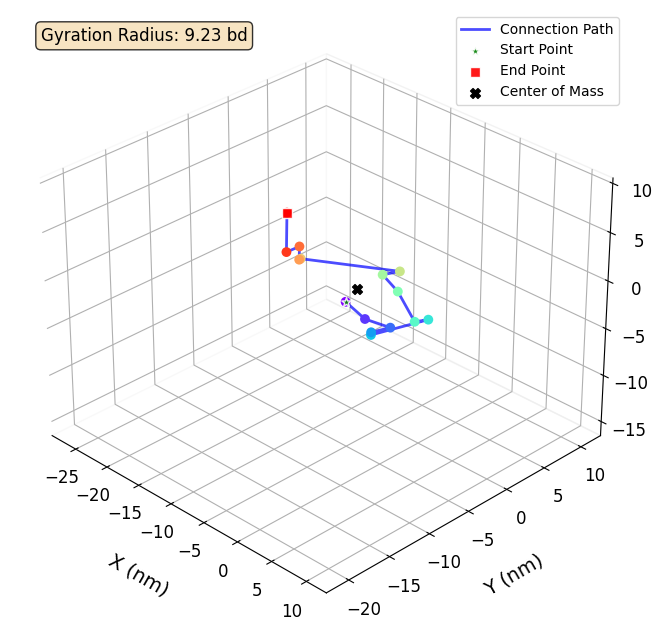

9.231452581196013

In [ ]:

plot_cell_points_3d_with_line_and_gyration(input_df, 'cell_140',combined_list_A2)
#A1 X: -17,-9 Y: -7.5,12.5 Z: -15,7.5
#A2 X:-28,-18 Y: -22,-10 Z: -16,2
#B2 X: 2,12 Y: -6,7 Z: -5,7
#B1 X: 3,10 Y: -21,-14 Z: 3,10


In [173]:
##使用连续的10个bin
combined_list_A1 = list(range(167,177))
combined_list_A2 = list(range(284,294))
combined_list_B2 = list(range(1677,1687))
combined_list_B1 = list(range(1636,1646))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

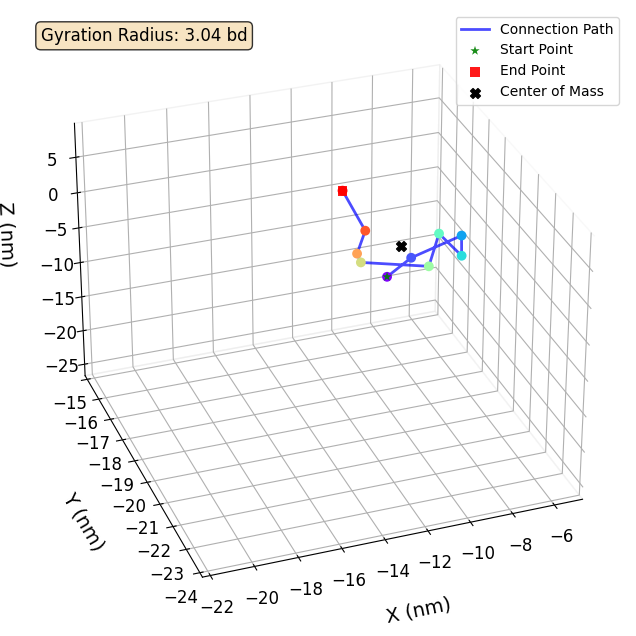

3.0381960735903224

In [288]:
plot_cell_points_3d_with_line_and_gyration(input_df, 'cell_6',combined_list_B2)

In [ ]:
##计算500个cell的回转半径

In [ ]:
def calculate_gyration_radius(input_df,row_indices):
    results = []
    for cell_number in set(input_df['cell number']):
        cell_df = input_df[input_df['cell number'] == cell_number].reset_index(drop=True)    

        points_df = cell_df.iloc[row_indices]
        coords = points_df[['x(nm)','y(nm)','z(nm)']].values
        center_of_mass = np.mean(coords, axis=0)
        squared_distances = np.sum((coords - center_of_mass)**2, axis=1)
        gyration_radius = np.sqrt(np.mean(squared_distances))
        results.append({'cell number': cell_number, 'gyration_radius': gyration_radius})
    
    return pd.DataFrame(results)

In [194]:
input_df2 = input_df[input_df['cell number']=="cell_1"]

In [183]:
#A_final_result = calculate_gyration_radius(input_df,list(range(168,178)))
A1_final_result = calculate_gyration_radius(input_df,combined_list_A1)
A2_final_result = calculate_gyration_radius(input_df,combined_list_A2)
B1_final_result = calculate_gyration_radius(input_df,combined_list_B1)
B2_final_result = calculate_gyration_radius(input_df,combined_list_B2)

In [187]:
B1_final_result.to_csv('/mnt/disk2/3/gy/3w_fig3/manuscript_related/example/B1_gyration_radius.txt',sep='\t',index=None,header=True)

In [202]:
#B_final_result = calculate_gyration_radius(input_df,list(range(1637,1647)))
B_final_result = calculate_gyration_radius(input_df,list(range(1678,1688)))

In [203]:
B_final_result.to_csv('/mnt/disk2/3/gy/3w_fig3/example/gyration_radius/B2_gyration_radius.txt',sep='\t',index=None,header=True)